In [1]:
import os
import csv
import time
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
import cv2
import scipy.io as sio
import numpy as np
import subprocess
import time

In [2]:
def run_task(group,group_dir, output_dir, config_name, frames):
    
    if not os.path.exists(output_dir): # make output folder
        os.makedirs(output_dir)
       
    if os.path.isfile('keypoints_data.mat'):
        os. remove('keypoints_data.mat')         
    if os.path.isfile('homografias.mat'):
        os. remove('homografias.mat')         
        

    # run project
    if os.path.isfile(os.path.join(group_dir, 'process_video.py')):
        output = subprocess.run('cd %s && python3 process_video.py %s' %(group_dir, config_name), capture_output=True, shell=True)
    elif os.path.isfile(os.path.join(group_dir, 'process_video.m')):
        output = subprocess.run('cd %s && octave process_video.m %d %s %s' %(group_dir, config_name), capture_output=True, shell=True)
    else:
        outputs.append([group,'Code is not available in %s' %group_dir, time.time() - start_time])
        print('Code for process_video is not available in %s' %group_dir)
        return
    #outputs.append([group,output.stdout.decode('utf-8'),str(time.time() - start_time)])
    print(output.stdout.decode('utf-8'))
    outputs.append([group,'time',output.stderr.decode('utf-8'),str(time.time() - start_time)])
    print(output.stderr.decode('utf-8'))

    
    if os.path.isfile(os.path.join(group_dir, 'compute_transform.py')):
        output = subprocess.run('cd %s && python3 compute_transform.py %s' %(group_dir, config_name), capture_output=True, shell=True)
    elif os.path.isfile(os.path.join(group_dir, 'compute_transform.m')):
        output = subprocess.run('cd %s && octave compute_transform.m %d %s %s' %(group_dir, config_name), capture_output=True, shell=True)
    else:
        outputs.append([group,'Code is not available in %s' %group_dir, time.time() - start_time])
        print('Code for compute_transform is not available in %s' %group_dir)
        return
    #outputs.append([group,output.stdout.decode('utf-8'),str(time.time() - start_time)])
    print(output.stdout.decode('utf-8'))
    outputs.append([group,'time',output.stderr.decode('utf-8'),str(time.time() - start_time)])
    print(output.stderr.decode('utf-8'))

    s,s1,s2,s3= np.shape(frames)
    data = sio.loadmat('homografias.mat')
    #M = data['transforms']
    #M = data['transforms_out']
    #M = data['all']
    
    for value in data.values():
        M=value
    print(np.shape(M))
            
    a,b= np.shape(M)
    if a !=11:
        M=np.transpose(M)
    
    limits, Hs = [], []
    
    Hs=[]
    for k in range(M.shape[1]):
        i = M[0,k]
        j = M[1,k]
    
        H = np.double(np.reshape(M[2:,k],(3,3)))    
        Hs.append(H)
    # Get limits
        corners = np.array([[0,0,1],[0,s1,1],[s2,s1,1],[s2,0,1],[0,0,1]])
        nc = np.matmul(corners,H.T)
        limits.append(nc[:,0:2]/(nc[:,2:3]))
        plt.plot(nc[:,0],nc[:,1])    
        #input("Press Enter to continue...")
        #plt.show()
           
    # Find limits
    lims = np.concatenate(limits,axis=0)
    minx, maxx = lims[:,0].min(), lims[:,0].max()
    miny, maxy = lims[:,1].min(), lims[:,1].max()
    maxsize = 1024
    size = np.array((maxy-miny,maxx-minx))
    scale = maxsize/size.max()
    nsize = size*scale
    
    nHs = []
    for H in Hs:
        nH = np.copy(H)
        nH[0] = (nH[0]-H[2]*minx)*scale
        nH[1] = (nH[1]-H[2]*miny)*scale
        nHs.append(nH)
    
    print(group)
    
    plt.savefig(output_dir+'homografias'+'_trymefirst_veryshort_'+group+'.png') 
    

   

/home/group1/
Running Task ... /home/group1/




(11, 24)
group1
Task finished in 15.547426462173462 seconds


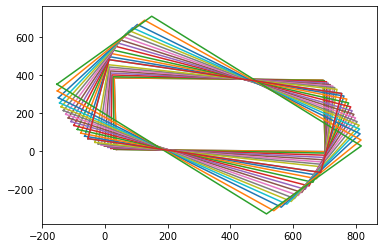

In [3]:
 
    
####################################################################################################################################################
####################################################################################################################################################    
################################################################ SCRIPT STARTS HERE ################################################################
####################################################################################################################################################
####################################################################################################################################################



config_name='/home/group1/myconfig.cfg'
input_dir = '/DATASETS/trymefirst_short.mp4'


cap = cv2.VideoCapture(input_dir)

frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)
cap.release()


outputfilename = 'output_%s.csv' %time.strftime("%H_%M_%S", time.localtime())#      <--- error messages will be stored in this file (has timestamp)
with open(outputfilename, 'w') as f: 
    write = csv.writer(f)
    write.writerow(['Group','Error'])
    
with open('code_location.txt') as f: 
    lines = f.readlines()

    
for l in lines:
    aux = l.split(';')
    group = aux[0]
    group_dir = aux[1]
    output_dir = 'OUTPUTS/'
    print(group_dir)
    outputs = []
    
    try:
        print('Running Task ...',group_dir)
        start_time = time.time()
        run_task(group,group_dir,output_dir,config_name, frames)
        print('Task finished in %s seconds' % str(time.time() - start_time))
    except Exception as e: 
        print(e) 
        outputs.append([group, e])
        
    with open(outputfilename, 'a') as f:
        write = csv.writer(f)
        write.writerows(outputs)
        
        